In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
theta_row = np.arange(0, 1, 0.01)

Имеет смысл исследовать график $\frac{1}{i(\theta)}$, так как графики для других размеров выборок будут отличаться только множителем $\frac{1}{n}$. <br>
$i(\theta) = E_\theta(\frac{\partial}{\partial \theta}ln(f(x))$ <br>
$f(x) = \theta^x (1-\theta)^{(1-x)}$ <br>
$i(\theta) = \frac{1}{\theta(1-\theta)}$

График нижнего порога дисперсии несмещенной оценки:

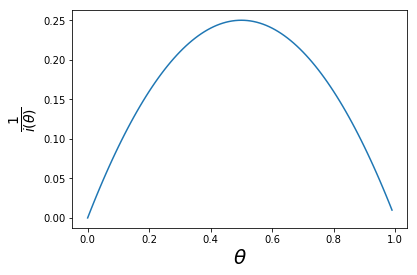

In [21]:
plt.plot(theta_row, theta_row*(1-theta_row))
plt.xlabel('$\\theta$', fontsize=20)
plt.ylabel('$\\frac{1}{i(\\theta)}$', fontsize=20)
plt.show()

Из графика видно, что чем ближе theta к 0.5, тем хуже мы можем ее оценить.

Генерируем выборки для каждого $\theta$, считаем оценку $\overline{X}$ (она является эффективной) и ее бутстрепную дисперсию. 

In [30]:
bootstrap_disp = []
for theta in theta_row:
    theta_est = np.mean(np.random.binomial(1, theta, 1000))
    bootstrap_estimations = np.array([np.mean(np.random.binomial(1, theta_est, 1000)) for i in range(500)])
    bootstrap_disp.append(np.mean(bootstramp_estimations**2) - np.mean(bootstrap_estimations)**2)

Выводим зависимость бутстрепной оценки от параметра. Нижняя граница, посчитанная разнице, делится на 1000, т.к. $I_X(\theta) = ni(\theta)$.

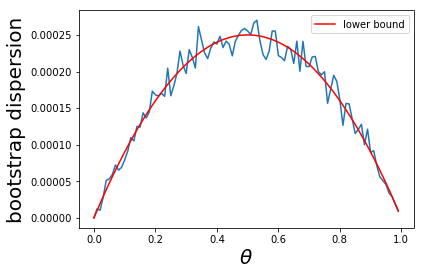

In [32]:
plt.plot(theta_row, np.array(bootstrap_disp))
plt.plot(theta_row, theta_row*(1-theta_row)/1000.0, color='r', label='lower bound')
plt.legend()
plt.xlabel('$\\theta$', fontsize=20)
plt.ylabel('bootstrap dispersion', fontsize=20)
plt.show()